## Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

## Barplot config

In [2]:
sns.set(color_codes=True)

def show_values_on_bars_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.3f}%'.format(p.get_height()*100)
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() #+ 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.3f}%'.format(p.get_width()*100)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
     

# Stats

In [3]:
stats_unique_words_df = pd.read_csv("stats_unique_words_df.csv", index_col = 0)
stats_unique_words_df

,items_list,stats
0,total_unique_words,610714
1,total_unique_words_lh,7962
2,word_list_set_lh_clitic,6
3,total_unique_words_nh,10815
4,diminutives,4220
5,total_unique_words_p,118478
6,total_unique_words_m,131934
7,word_list_set_m_clitic,5


In [4]:
list(stats_unique_words_df.items_list)

['total_unique_words',
 'total_unique_words_lh',
 'word_list_set_lh_clitic',
 'total_unique_words_nh',
 'diminutives',
 'total_unique_words_p',
 'total_unique_words_m',
 'word_list_set_m_clitic']

In [5]:
di = {"total_unique_words_p": "word_p", "total_unique_words_m": "word_m", "total_unique_words_lh": "word_lh",
     "word_list_set_lh_clitic": "word_lh_clitic", "total_unique_words_nh": "word_nh", "diminutives": "word_nh_diminutive"}
stats_unique_words_df["items_list"].replace(di, inplace=True)
stats_unique_words_df

,items_list,stats
0,total_unique_words,610714
1,word_lh,7962
2,word_lh_clitic,6
3,word_nh,10815
4,word_nh_diminutive,4220
5,word_p,118478
6,word_m,131934
7,word_list_set_m_clitic,5


In [6]:
stats_unique_words_df = stats_unique_words_df.reindex([0, 5, 6, 1, 2, 3, 4]).reset_index(drop=True)
stats_unique_words_df

,items_list,stats
0,total_unique_words,610714
1,word_p,118478
2,word_m,131934
3,word_lh,7962
4,word_lh_clitic,6
5,word_nh,10815
6,word_nh_diminutive,4220


In [7]:
max_total_words_length = stats_unique_words_df["stats"].max()

stats_unique_words_df["stats"] = stats_unique_words_df["stats"]/max_total_words_length
stats_unique_words_df["stats"] = stats_unique_words_df["stats"].round(5)
stats_unique_words_df.drop(index=stats_unique_words_df.index[0], axis=0, inplace=True)
stats_unique_words_df

,items_list,stats
1,word_p,0.19400
2,word_m,0.21603
3,word_lh,0.01304
4,word_lh_clitic,0.00001
5,word_nh,0.01771
6,word_nh_diminutive,0.00691


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

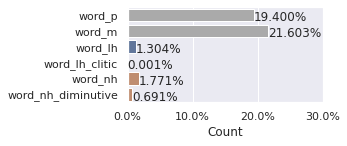

In [8]:
all_colors = {
    #'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963',
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="stats", y="items_list" , data=stats_unique_words_df)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(3.5, 1.75)
ax.set(xlabel="Count", ylabel="")

In [9]:
stats_df = pd.read_csv("stats_df.csv", index_col = 0)
stats_df

,items_list,stats
0,total_words,171654564
1,total_words_lh,1620609
2,total_words_lh_clitic,183532
3,total_words_nh,1631245
4,total_words_diminutive,94647
5,total_words_p,24042739
6,total_words_m,21021010
7,total_words_m_clitic,715472


In [10]:
list(stats_df.items_list)

['total_words',
 'total_words_lh',
 'total_words_lh_clitic',
 'total_words_nh',
 'total_words_diminutive',
 'total_words_p',
 'total_words_m',
 'total_words_m_clitic']

In [11]:
di = {"total_words_p": "word_p", "total_words_m": "word_m", "total_words_lh": "word_lh",
     "total_words_lh_clitic": "word_lh_clitic", "total_words_nh": "word_nh", "total_words_diminutive": "word_nh_diminutive"}
stats_df["items_list"].replace(di, inplace=True)
stats_df

,items_list,stats
0,total_words,171654564
1,word_lh,1620609
2,word_lh_clitic,183532
3,word_nh,1631245
4,word_nh_diminutive,94647
5,word_p,24042739
6,word_m,21021010
7,total_words_m_clitic,715472


In [12]:
stats_df = stats_df.reindex([0, 5, 6, 1, 2, 3, 4]).reset_index(drop=True)
stats_df

,items_list,stats
0,total_words,171654564
1,word_p,24042739
2,word_m,21021010
3,word_lh,1620609
4,word_lh_clitic,183532
5,word_nh,1631245
6,word_nh_diminutive,94647


In [13]:
max_total_words_length = stats_df["stats"].max()

stats_df["stats"] = stats_df["stats"]/max_total_words_length
stats_df["stats"] = stats_df["stats"].round(5)
stats_df.drop(index=stats_df.index[0], axis=0, inplace=True)
stats_df

,items_list,stats
1,word_p,0.14006
2,word_m,0.12246
3,word_lh,0.00944
4,word_lh_clitic,0.00107
5,word_nh,0.00950
6,word_nh_diminutive,0.00055


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

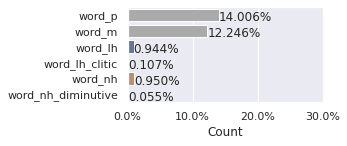

In [14]:
all_colors = {
    #'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963',
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="stats", y="items_list" , data=stats_df)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(3.5, 1.75)
ax.set(xlabel="Count", ylabel="")